# 5. Adding Units

In [79]:
import numpy as np
import astropy.constants as c # Note we're importing the MODULE now!
import astropy.units as u

In [80]:
def F(r, M, Mdot, r_in):
    flux = 3. * G * M * Mdot / (8. * np.pi * r**3) * (1. - np.sqrt(r_in / r))    # Calculate the flux
    return flux.to(u.Unit("erg/(cm2 s)")) # Return the flux with the right units!

In [81]:
# Import plotting package and tell it to show the plots right here in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

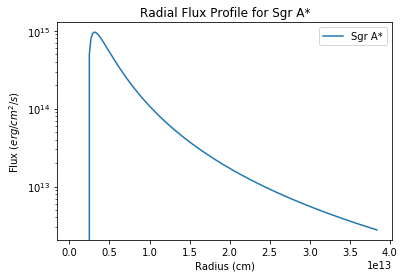

In [96]:
# Since we want to model a particular black hole, put its parameters here
# Values are from https://ui.adsabs.harvard.edu/abs/1999ApJ...517L.101Q
sgr_mass = 2.6e6*u.M_sun
sgr_mdot = 8e-5*u.M_sun/u.yr
grav_radius = (G * sgr_mass / c.c**2).to(u.cm) # Calculate gravitational radius

# Create an array of radii based on r_g
radii = np.linspace(grav_radius, 100*grav_radius, 200)

# Use the flux function to create data for Sgr A*
data_1 = F(radii, M=sgr_mass, Mdot=sgr_mdot, r_in=6*grav_radius)

# Plot the data we just made on the same graph using different labels
plt.plot(radii, data_1, label='Sgr A*')
plt.title("Radial Flux Profile for Sgr A*")
plt.xlabel("Radius (cm)") # Set the label on the x axis
plt.ylabel("Flux ($erg/cm^2/s$)") # Set the label on the y axis
plt.yscale("log")# Use a log-scale on the y axis instead of linear
plt.legend() # Show the legend
plt.show()